### Customer Churn Prediction Using Machine Learning


![Customer Churn Analyzer](https://camo.githubusercontent.com/899de7f9c173b3fabd9804f791436e5c27b6686ae582fd7b46c06bfacebf6719/68747470733a2f2f6d656469612e6c6963646e2e636f6d2f646d732f696d6167652f44344431324151486568466a7246704c622d412f61727469636c652d636f7665725f696d6167652d736872696e6b5f3630305f323030302f302f313639323536353439353436333f653d3231343734383336343726763d6265746126743d463844374f4d75626956384b52707450614e2d7631556e6f474d6373534f456f70385268454b586972546b)


##### Customer Churn Analysis

Customer churn is a critical business challenge, impacting revenue and customer retention strategies. This notebook explores customer churn prediction using machine learning techniques, providing insights into customer behavior and factors contributing to churn.

##### Objectives:
- Load and preprocess customer data.
- Perform exploratory data analysis (EDA) to understand key patterns.
- Train and evaluate machine learning models, including logistic regression, random forests, and XGBoost.
- Interpret model performance using metrics such as accuracy, confusion matrices, and classification reports.

By the end of this notebook, we aim to develop an effective churn prediction model that can help businesses take proactive steps to retain valuable customers.


## 1. Load Data & Libraries

In [1]:
import pandas as pd
from IPython.display import display, HTML, Markdown
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier


In [3]:
file_path = "/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(file_path)


## 2. Unveiling Dataset: Structure & Insights

#### Missing Values Overview

This subsection highlights the presence of missing values across the dataset by summarizing null counts for each column. Identifying these gaps is crucial for planning data cleaning and ensuring robust analysis.


In [4]:
display(HTML("<h3 style='color: red;'>Dataset Overview:</h3>"))
df.head(4)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No


In [5]:
shape_df = pd.DataFrame({"Attribute": ["Rows", "Columns"], "Count": [df.shape[0], df.shape[1]]})

display(HTML("<h3 style='color: red;'>Dataset Shape:</h3>"))
display(shape_df.style.set_properties(**{'color': 'black', 'font-weight': 'bold'}))


,Attribute,Count
0,Rows,7043
1,Columns,21


In [6]:
buffer = io.StringIO()
df.info(buf=buffer)
info_str = buffer.getvalue()

info_html = f"<h3 style='color: red;'>Dataset Info:</h3><pre style='color: black;'>{info_str}</pre>"
display(HTML(info_html))


In [7]:
dtype_html = "<h3 style='color: red;'>Dataset Column Data Types:</h3><ul>"
for col, dtype in df.dtypes.items():
    dtype_html += f"<li><strong style='color: black;'>{col}</strong>: <span style='color: black;'>{dtype}</span></li>"
dtype_html += "</ul>"

display(HTML(dtype_html))


In [8]:
column_list = ", ".join(df.columns)
display(HTML(f"<h3 style='color: red;'>Dataset Columns:</h3><p style='color: black;'>{[column_list]}</p>"))


In [9]:
missing_counts = df.isnull().sum()

display(HTML("<h3 style='color: red;'>Missing Values Summary:</h3>"))
display(HTML(f"<pre style='color: black;'>{missing_counts}</pre>"))


In [10]:
num_duplicates = df.duplicated().sum()
display(Markdown(f"### Total Duplicate Rows Found: **{num_duplicates}**"))


### Total Duplicate Rows Found: **0**

## 3. EDA

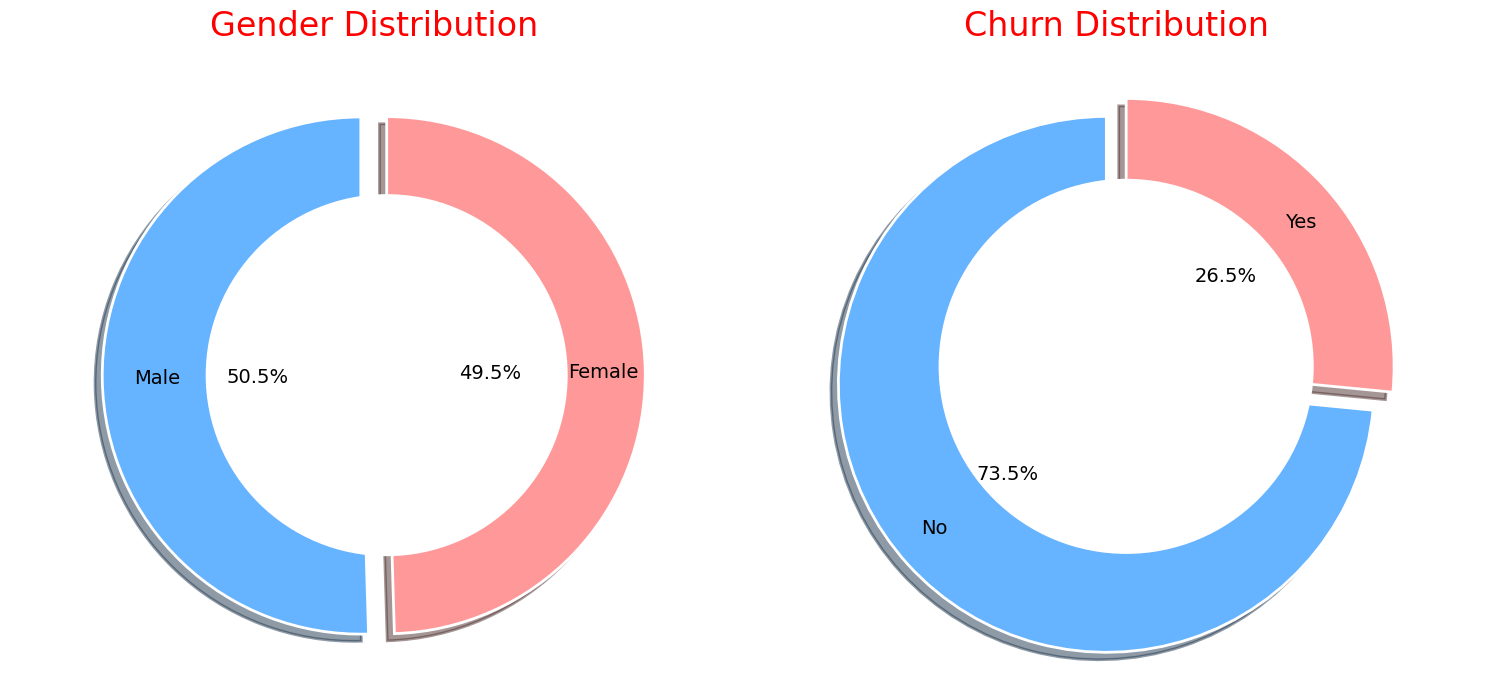

In [11]:
gender_counts = df["gender"].value_counts()
churn_counts = df["Churn"].value_counts()

explode_gender = np.where(gender_counts.index == gender_counts.idxmax(), 0.1, 0)
explode_churn = np.where(churn_counts.index == churn_counts.idxmax(), 0.1, 0)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

patches1, texts1, autotexts1 = ax1.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    colors=['#66b3ff', '#ff9999'],
    startangle=90,
    textprops={'fontsize': 14},
    labeldistance=0.7,
    pctdistance=0.4,
    explode=explode_gender,
    shadow=True,
    wedgeprops=dict(edgecolor='white', linewidth=2)
)
centre_circle1 = plt.Circle((0, 0), 0.70, fc='white')
ax1.add_artist(centre_circle1)
ax1.set_title("Gender Distribution", pad=25, fontsize=24, color="red")
ax1.axis('equal')

patches2, texts2, autotexts2 = ax2.pie(
    churn_counts,
    labels=churn_counts.index,
    autopct='%1.1f%%',
    colors=['#66b3ff', '#ff9999'],
    startangle=90,
    textprops={'fontsize': 14},
    labeldistance=0.8,
    pctdistance=0.5,
    explode=explode_churn,
    shadow=True,
    wedgeprops=dict(edgecolor='white', linewidth=2)
)
centre_circle2 = plt.Circle((0, 0), 0.70, fc='white')
ax2.add_artist(centre_circle2)
ax2.set_title("Churn Distribution", pad=25, fontsize=24, color="red")
ax2.axis('equal')

plt.tight_layout()
plt.show()


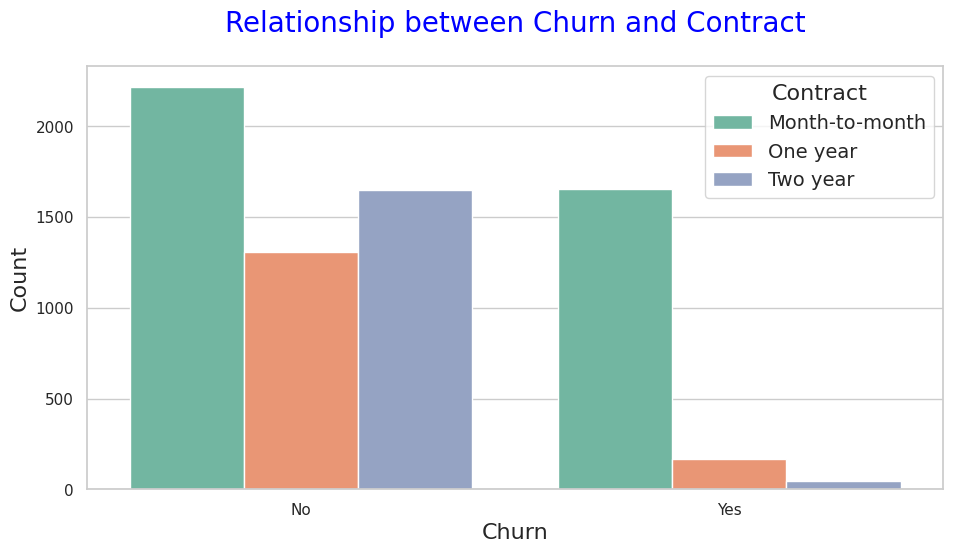

In [12]:
sns.set_theme(style="whitegrid")
custom_palette = sns.color_palette("Set2")

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Churn", hue="Contract", palette=custom_palette)
plt.title("Relationship between Churn and Contract", fontsize=20, color="blue", pad=25)
plt.xlabel("Churn", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.legend(title="Contract", title_fontsize=16, fontsize=14, loc="upper right")
plt.tight_layout(pad=2.0)
plt.show()


In [13]:
import plotly.express as px

# Define custom color palette
custom_colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b"]

# Create sunburst chart
fig = px.sunburst(
    df,
    path=["Churn", "PaymentMethod"],
    color="PaymentMethod",
    color_discrete_sequence=custom_colors,
    title="<b>Customer Payment Method with Respect to Churn</b>",
    width=800,
    height=600
)

# Update layout for better presentation
fig.update_layout(
    margin=dict(t=100, l=0, r=0, b=0),
    title=dict(text="<b>Customer Payment Method with Respect to Churn</b>", font_size=26, x=0.5)
)

# Display the figure
fig.show()


In [14]:
import plotly.express as px

# Create histogram for Monthly Charges distribution
fig = px.histogram(
    df,
    x="MonthlyCharges",
    nbins=30,
    title="<b>Distribution of Monthly Charges</b>"
)

# Update layout for better presentation
fig.update_layout(
    width=800,
    height=500,
    title=dict(text="<b>Distribution of Monthly Charges</b>", font=dict(size=24, family="Arial", color="darkblue"), x=0.5),
    xaxis_title="Monthly Charges ($)",
    yaxis_title="Count",
    plot_bgcolor="rgba(0,0,0,0)",  # Transparent plot background
    paper_bgcolor="white",
    margin=dict(t=80, b=60, l=60, r=40)
)

# Display the figure
fig.show()


In [15]:
import plotly.express as px

# Create a box plot for Monthly Charges by Churn status
fig = px.box(
    df,
    x="Churn",
    y="MonthlyCharges",
    color="Churn",
    color_discrete_sequence=["#636EFA", "#EF553B"],
    title="<b>Monthly Charges by Churn Status</b>"
)

# Update layout for better presentation
fig.update_layout(
    width=800,
    height=500,
    title=dict(text="<b>Monthly Charges by Churn Status</b>", font=dict(size=24, family="Arial", color="darkblue"), x=0.5),
    xaxis_title="Churn Status",
    yaxis_title="Monthly Charges ($)",
    plot_bgcolor="rgba(0,0,0,0)",  # Transparent plot background
    paper_bgcolor="white",
    margin=dict(t=80, b=60, l=60, r=40)
)

# Display the figure
fig.show()


In [16]:
import plotly.express as px

# Create a violin plot for Monthly Charges distribution by Churn status
fig = px.violin(
    df,
    x="Churn",
    y="MonthlyCharges",
    color="Churn",
    box=True,  # Show box plot inside the violin
    points="all",  # Show all individual data points
    color_discrete_sequence=["#636EFA", "#EF553B"],
    title="<b>Monthly Charges Distribution by Churn Status</b>"
)

# Update layout for better presentation
fig.update_layout(
    width=800,
    height=500,
    title=dict(text="<b>Monthly Charges Distribution by Churn Status</b>", font=dict(size=24, family="Arial", color="darkblue"), x=0.5),
    xaxis_title="Churn Status",
    yaxis_title="Monthly Charges ($)",
    plot_bgcolor="rgba(0,0,0,0)",  # Transparent plot background
    paper_bgcolor="white",
    margin=dict(t=80, b=60, l=60, r=40)
)

# Display the figure
fig.show()


<ipython-input-17-a8673e4690f6>:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



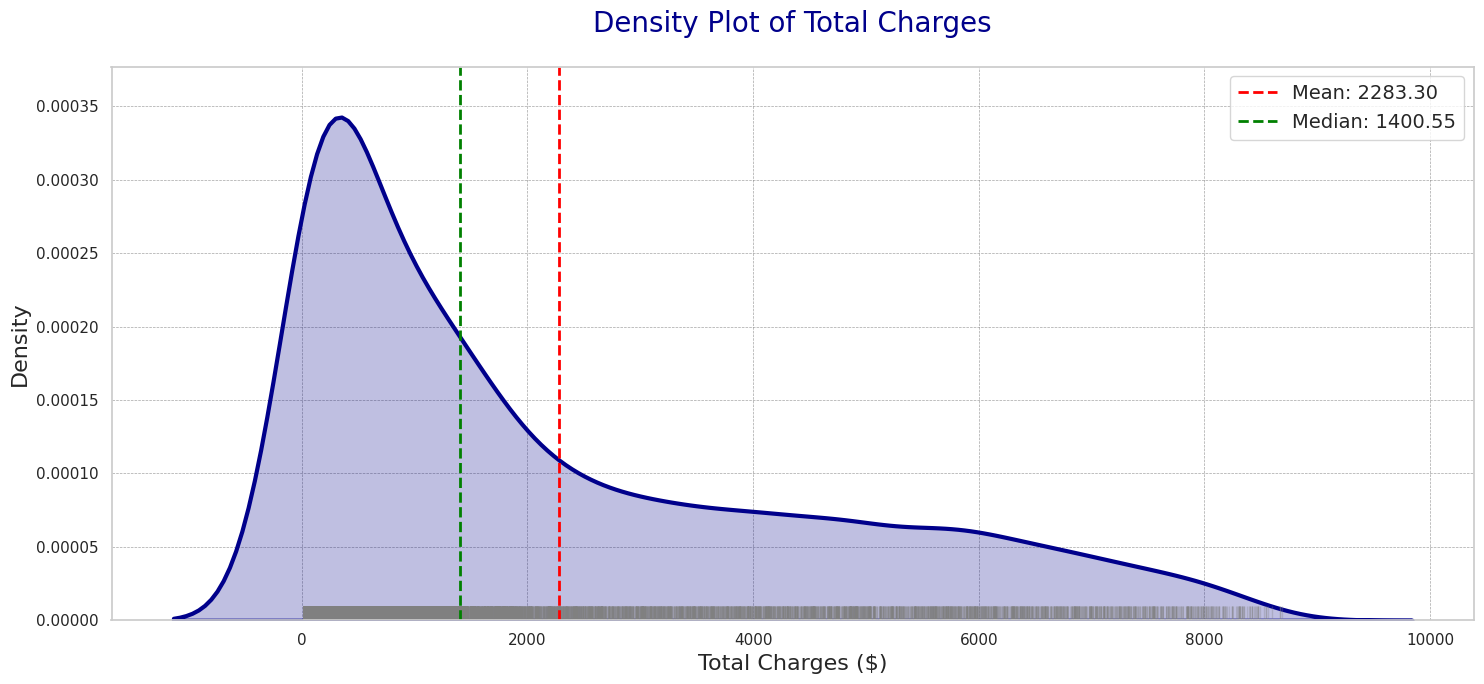

In [17]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

df["TotalCharges"].fillna(df["TotalCharges"].mean(), inplace=True)

plt.figure(figsize=(15, 7))

sns.kdeplot(data=df, x="TotalCharges", fill=True, color="darkblue", linewidth=3)

sns.rugplot(data=df, x="TotalCharges", color="gray", alpha=0.3)

mean_val = df["TotalCharges"].mean()
median_val = df["TotalCharges"].median()

plt.axvline(mean_val, color="red", linestyle="--", linewidth=2, label=f"Mean: {mean_val:.2f}")
plt.axvline(median_val, color="green", linestyle="--", linewidth=2, label=f"Median: {median_val:.2f}")

plt.title("Density Plot of Total Charges", fontsize=20, pad=25, color="darkblue")
plt.xlabel("Total Charges ($)", fontsize=16)
plt.ylabel("Density", fontsize=16)

plt.legend(fontsize=14)
plt.grid(color="gray", linestyle="--", linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


## 4. preprocessing

In [18]:
df.replace('No internet service', 'No', inplace=True)


In [19]:
df.drop('customerID',axis=1,inplace=True)

In [20]:
label_encoders = {}

for col in df.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [21]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [22]:
df.isna().sum()


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [23]:
imputer = SimpleImputer(strategy='mean')
df['TotalCharges'] = imputer.fit_transform(df[['TotalCharges']])


In [24]:
df.isna().sum()


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [25]:
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

for col in ["tenure", "MonthlyCharges", "TotalCharges"]:
    df = remove_outliers(df, col)
    

In [26]:
scaler = StandardScaler()
df[["tenure", "MonthlyCharges", "TotalCharges"]] = scaler.fit_transform(
    df[["tenure", "MonthlyCharges", "TotalCharges"]])

print(df[["tenure", "MonthlyCharges", "TotalCharges"]].head())


     tenure  MonthlyCharges  TotalCharges
0 -1.277445       -1.160323     -0.994971
1  0.066327       -0.259629     -0.173876
2 -1.236724       -0.362660     -0.960399
3  0.514251       -0.746535     -0.195400
4 -1.236724        0.197365     -0.941193


In [27]:
df.shape


(7043, 20)

In [28]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,-1.277445,0,1,0,0,1,0,0,0,0,0,1,2,-1.160323,-0.994971,0
1,1,0,0,0,0.066327,1,0,0,1,0,1,0,0,0,1,0,3,-0.259629,-0.173876,0
2,1,0,0,0,-1.236724,1,0,0,1,1,0,0,0,0,0,1,3,-0.362660,-0.960399,1
3,1,0,0,0,0.514251,0,1,0,1,0,1,1,0,0,1,0,0,-0.746535,-0.195400,0
4,0,0,0,0,-1.236724,1,0,1,0,0,0,0,0,0,0,1,2,0.197365,-0.941193,1


## 5. Modeling

In [29]:
from imblearn.over_sampling import SMOTE

X = df.drop(['Churn','gender'], axis=1)
y = df['Churn']

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)


#### 4.1 LogisticRegression

In [30]:
lr_model = LogisticRegression(max_iter=1000)

lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\n\n")
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7990338164251207



Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.76      0.79      1021
           1       0.78      0.83      0.81      1049

    accuracy                           0.80      2070
   macro avg       0.80      0.80      0.80      2070
weighted avg       0.80      0.80      0.80      2070



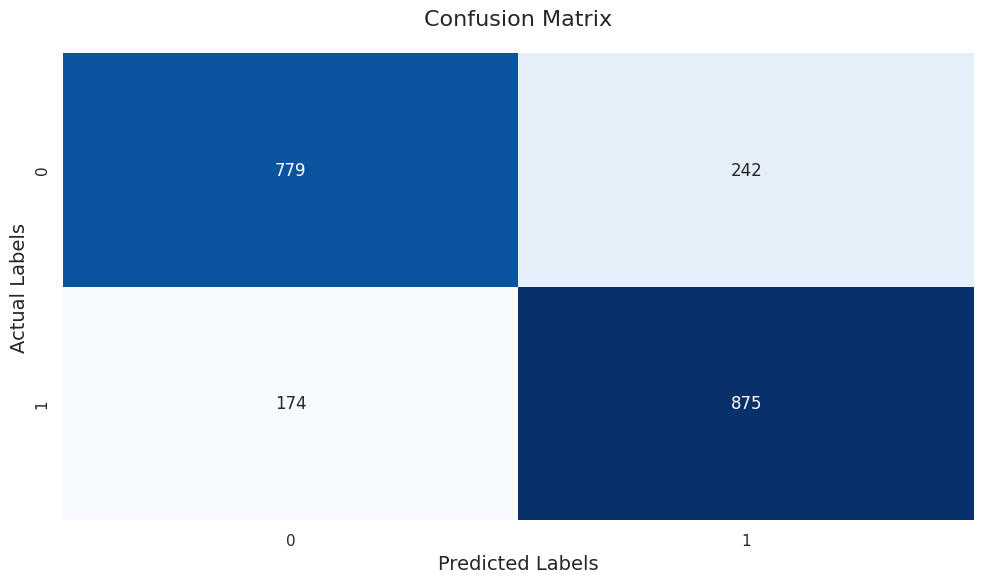

In [31]:
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("Actual Labels", fontsize=14)
plt.title("Confusion Matrix", fontsize=16, pad=20)
plt.tight_layout()
plt.show()


##### 4.2 XGBClassifier

In [32]:
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\n\n")
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.8260869565217391



XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.79      0.82      1021
           1       0.81      0.86      0.83      1049

    accuracy                           0.83      2070
   macro avg       0.83      0.83      0.83      2070
weighted avg       0.83      0.83      0.83      2070



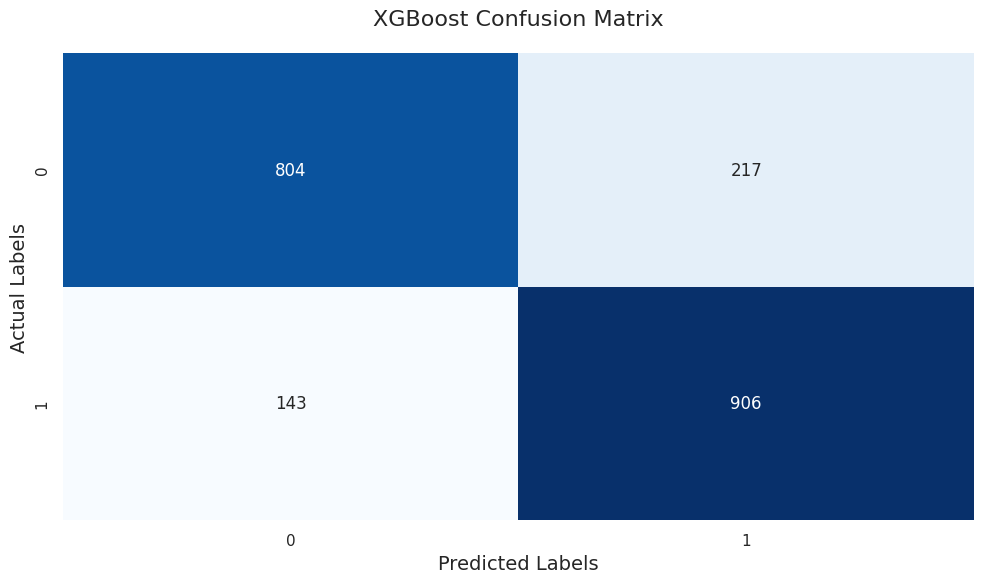

In [33]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Plot the confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("Actual Labels", fontsize=14)
plt.title("XGBoost Confusion Matrix", fontsize=16, pad=20)
plt.tight_layout()
plt.show()


In [34]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("RandomForest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


RandomForest Accuracy: 0.8386473429951691

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.82      0.83      1021
           1       0.83      0.85      0.84      1049

    accuracy                           0.84      2070
   macro avg       0.84      0.84      0.84      2070
weighted avg       0.84      0.84      0.84      2070



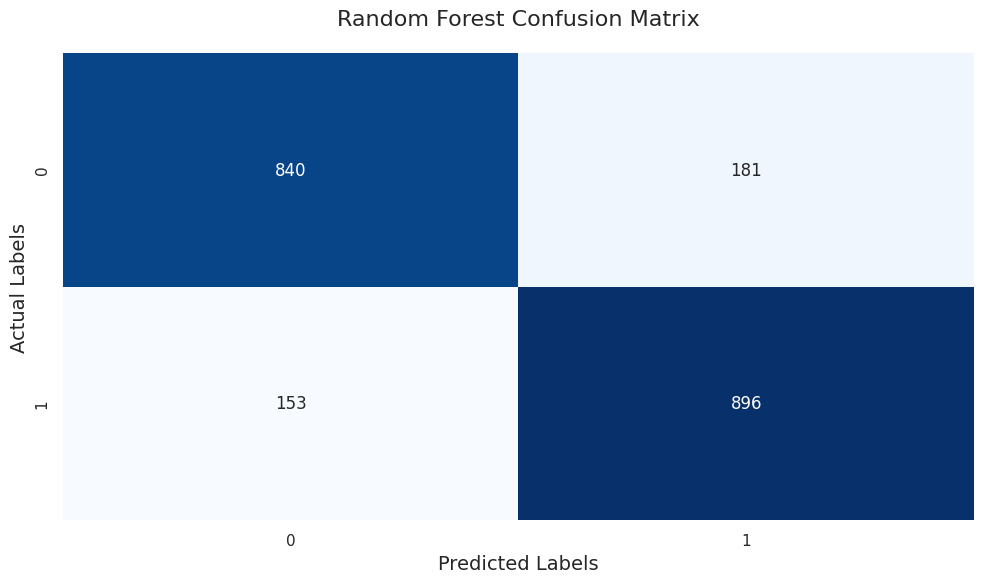

In [35]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(10, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("Actual Labels", fontsize=14)
plt.title("Random Forest Confusion Matrix", fontsize=16, pad=20)
plt.tight_layout()
plt.show()
